<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
'C:/Users/PCM/Downloads/m4_survey_data.sqlite'

'C:/Users/PCM/Downloads/m4_survey_data.sqlite'

In [3]:
import wget
url = 'C:/Users/PCM/Downloads/m4_survey_data.sqlite'
wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite


<function wget.filename_from_url(url)>

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect('C:/Users/PCM/Downloads/m4_survey_data.sqlite') # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
QUERY = """
SELECT Respondent,ConvertedComp, Age, WorkWeekHrs,  CodeRevHrs
FROM master
group by Respondent
order by Respondent
"""
df=pd.read_sql_query(QUERY,conn)
df

,Respondent,ConvertedComp,Age,WorkWeekHrs,CodeRevHrs
0,4,61000.0,22.0,80.0,NaN
1,9,95179.0,23.0,32.0,12.0
2,13,90000.0,28.0,40.0,5.0
3,16,455352.0,26.0,40.0,NaN
4,17,65277.0,29.0,45.0,5.0
...,...,...,...,...,...
11393,25136,130000.0,36.0,40.0,NaN
11394,25137,19880.0,25.0,40.0,5.0
11395,25138,105000.0,34.0,40.0,5.0
11396,25141,80371.0,25.0,42.5,2.0


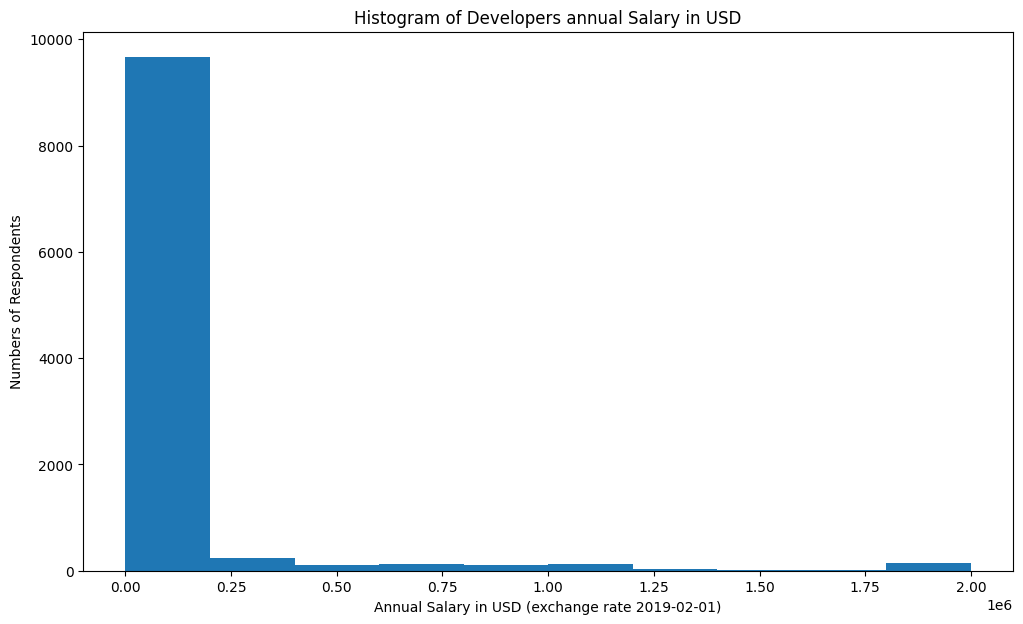

In [10]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', figsize=(12, 7))
plt.title('Histogram of Developers annual Salary in USD')
plt.xlabel('Annual Salary in USD (exchange rate 2019-02-01)')
plt.ylabel('Numbers of Respondents')
plt.show()

### Box Plots


Plot a box plot of `Age.`


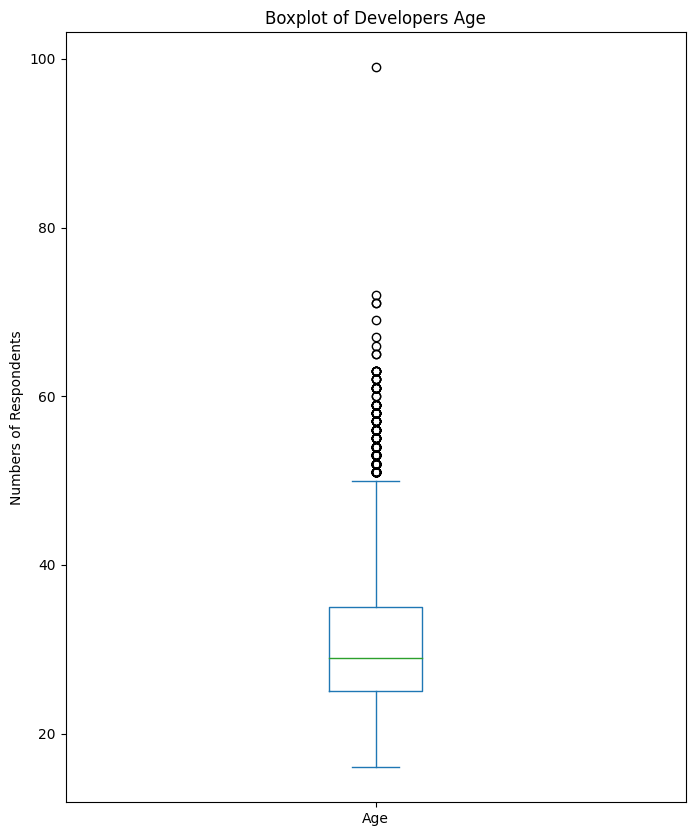

In [11]:
# your code goes here
df['Age'].plot(kind='box', figsize=(8, 10))
plt.title('Boxplot of Developers Age')

plt.ylabel('Numbers of Respondents')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot: xlabel='Age', ylabel='WorkWeekHrs'>

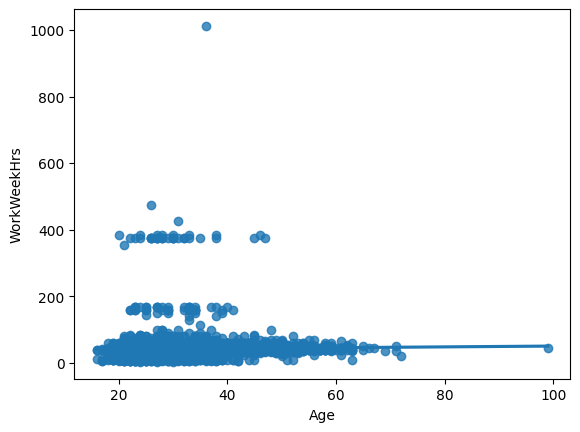

In [12]:
# your code goes here
sns.regplot(x="Age", y="WorkWeekHrs", data=df)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


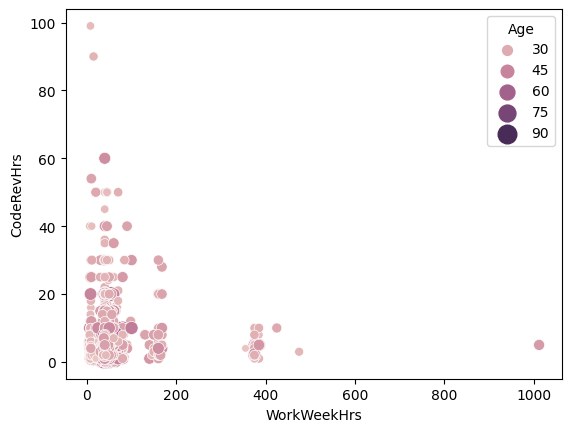

In [13]:
# your code goes here

# Brazil
ax = sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', sizes=(20,200))


## Visualizing composition of data


In [14]:
QUERY = """
SELECT DatabaseDesireNextYear, Count(DatabaseDesireNextYear) as total
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by total DESC Limit 5
"""
df1=pd.read_sql_query(QUERY,conn)
df1

,DatabaseDesireNextYear,total
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


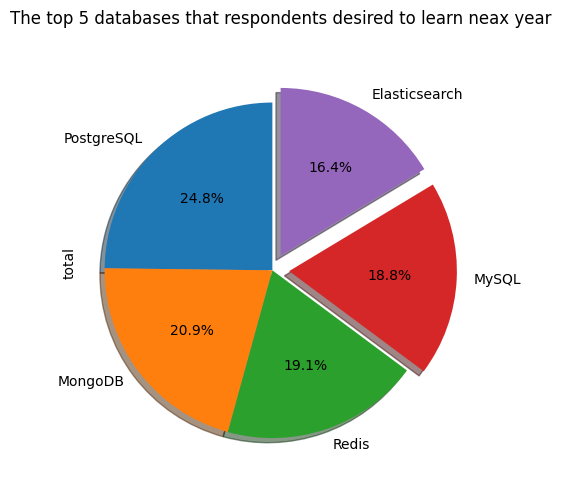

In [16]:
# your code goes here

QUERY = """
SELECT DatabaseDesireNextYear, Count(DatabaseDesireNextYear) as total
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by total DESC Limit 5
"""
df1=pd.read_sql_query(QUERY,conn)
labels = df1['DatabaseDesireNextYear']
explode = (0,0,0,0.1,0.1)
df1['total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,
                            explode=explode, 
                            labels=labels              # add shadow      
                            )

plt.title('The top 5 databases that respondents desired to learn neax year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


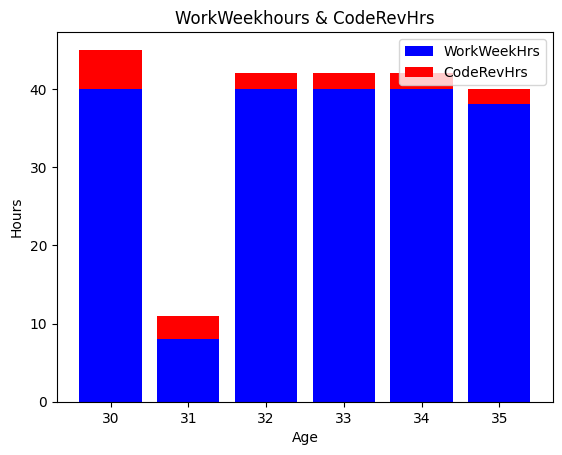

In [46]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age <= 35 AND Age >= 30
group by Age
order by Age
"""
df= pd.read_sql_query(QUERY,conn)

l1 = [30,31,32,33,34,35]
l2 = []
l3 = []

for i in l1:
    l2.append(df[df['Age']==i]['WorkWeekHrs'].median())
    l3.append(df[df['Age']==i]['CodeRevHrs'].median())

# Chart
labels = l1
y1 = l2
y2 = l3

plt.bar(labels, y1, color='b')
plt.bar(labels, y2, bottom=y1, color='r')
plt.legend(['WorkWeekHrs', 'CodeRevHrs'])
plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('WorkWeekhours & CodeRevHrs')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


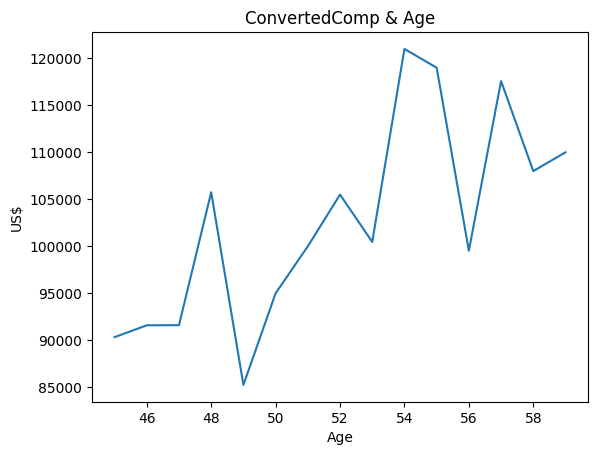

In [61]:
# your code goes here
QUERY = """
SELECT  Age, ConvertedComp
FROM master
WHERE Age <= 60 AND Age >= 45
order by Age
"""
df= pd.read_sql_query(QUERY,conn)
df
l1 = range(45, 60)
l2 = []

for i in l1:
    l2.append(df[df['Age']==i]['ConvertedComp'].median())
plt.figure()
plt.plot(l1, l2)
plt.xlabel('Age')
plt.ylabel('US$')
plt.title('ConvertedComp & Age')
plt.show()  


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [93]:
# your code goes here
QUERY = """
SELECT MainBranch, count(*) as total
FROM master
group by MainBranch
"""
df


,MainBranch,total
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


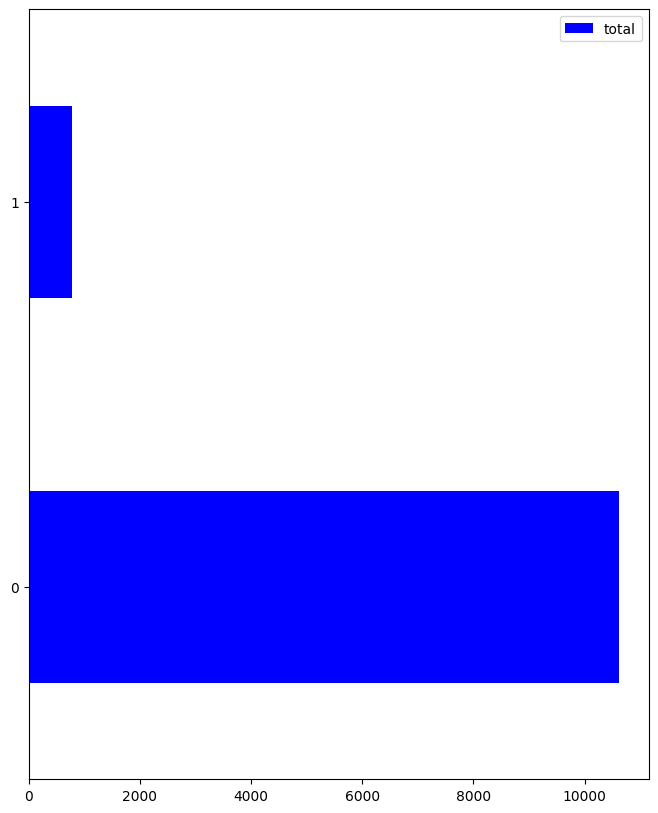

In [99]:
df= pd.read_sql_query(QUERY,conn)
df.plot(kind='barh', figsize=(8, 10), color='b')
plt.show()

Close the database connection.


In [100]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
